# Time series / date functionality

In [1]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [5]:
import datetime
import pandas as pd
import numpy as np

dti = pd.to_datetime(['1/1/2018', np.datetime64('2018-01-01'),datetime.datetime(2018, 1, 1)])

dti


DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [7]:
dti = pd.date_range('2018-01-01', periods=3, freq='H')

In [8]:
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [14]:
dti.tz_convert('UTC')

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [31]:
idx = pd.date_range('2018-01-01', periods=5, freq='H')

In [32]:
idx

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [33]:
ts = pd.Series(range(len(idx)), index=idx)

In [34]:
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [30]:
ts.resample('2H').mean()

2018-01-01 00:00:00    0.0
2018-01-01 02:00:00    NaN
2018-01-01 04:00:00    NaN
2018-01-01 06:00:00    NaN
2018-01-01 08:00:00    NaN
                      ... 
2018-01-05 16:00:00    NaN
2018-01-05 18:00:00    NaN
2018-01-05 20:00:00    NaN
2018-01-05 22:00:00    NaN
2018-01-06 00:00:00    3.0
Freq: 2H, Length: 61, dtype: float64

In [19]:
pd.Series(range(3), index=pd.date_range('2000', freq='D', periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [26]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx
#https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [27]:
ts = pd.Series(range(len(idx)), index=idx)

In [28]:
ts

2018-01-01    0
2018-01-04    1
2018-01-05    2
2018-01-06    3
dtype: int64

In [37]:
ts.resample('D').mean()

2018-01-01    2
Freq: D, dtype: int64

In [38]:
# https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/

In [39]:
from dateutil.parser import parse

In [40]:
dt1 = datetime.datetime(2016, 2, 19, 14)
dt2 = datetime.datetime(2016, 1, 2, 13)
td = dt1 - dt2
td

datetime.timedelta(days=48, seconds=3600)

In [49]:
t0 = datetime.datetime(2018, 9, 1)
d = datetime.timedelta(days=27)

In [52]:
t0 + d

datetime.datetime(2018, 9, 28, 0, 0)

In [53]:
# # survival_time 컬럼 이용해 survived 컬럼 생성 

# train_label.loc[train_label["day"] == 1 , "date"] = datetime.datetime(2018, 9, 1)
# train_label.loc[train_label["survival_time"] < 64 , "date"] = 0

In [55]:

act_raw = pd.read_csv("C:/Users/jamsi/JupyterProject/BigContest/BigContest/train_activity.csv")

In [56]:
act = act_raw

In [57]:
act.dtypes

day                    int64
acc_id                 int64
char_id                int64
server                object
playtime             float64
npc_kill             float64
solo_exp             float64
party_exp            float64
quest_exp            float64
boss_monster           int64
death                float64
revive               float64
exp_recovery         float64
fishing              float64
private_shop         float64
game_money_change    float64
enchant_count        float64
dtype: object

In [58]:
act.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.459994,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,1.119053,0.033934,0.0
1,1,75001,216231,aa,0.286785,2.244221,0.046989,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,-0.013933,0.0
2,1,75711,308769,aa,1.049964,2.951697,0.321164,0.166247,0.003463,1,0.24537,0.246819,0.0,0.0,0.000000,-0.001983,0.0
3,1,72230,387177,aa,0.232272,4.035346,0.098944,0.000000,0.001732,0,0.00000,0.000000,0.0,0.0,0.000000,-0.028823,0.0
4,1,34253,339862,aa,1.102106,0.595805,0.003371,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,0.011752,0.0


In [60]:

act.sort_values(['acc_id','day'])

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
37347,1,2,233598,au,2.737490,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,2.493091,1.022652,0.0
91650,2,2,233598,au,3.405864,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.188761,-1.042002,0.0
146424,3,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.223522,0.450366,0.0
201150,4,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.171419,-0.007215,0.0
256769,5,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.175172,0.015365,0.0
311844,6,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.174421,-0.003792,0.0
367212,7,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.174698,-0.363492,0.0
423613,8,2,233598,au,2.803853,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,2.576400,-0.006605,0.0
479282,9,2,233598,au,3.403494,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.110744,-0.010956,0.0
534937,10,2,233598,au,3.412974,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.184771,-0.182357,0.0


In [64]:
# from IPython.display import display
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 500)
# with pd.option_context('display.height', 500, 'display.max_rows', 500)

SyntaxError: invalid syntax (<ipython-input-64-3110da150907>, line 4)

In [65]:
from IPython.core.display import display, HTML
pd.set_option('display.max_rows', 500)

In [67]:

act.sort_values(['acc_id','day'])

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
37347,1,2,233598,au,2.737490,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,2.493091,1.022652,0.0
91650,2,2,233598,au,3.405864,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.188761,-1.042002,0.0
146424,3,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.223522,0.450366,0.0
201150,4,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.171419,-0.007215,0.0
256769,5,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.175172,0.015365,0.0
311844,6,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.174421,-0.003792,0.0
367212,7,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.174698,-0.363492,0.0
423613,8,2,233598,au,2.803853,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,2.576400,-0.006605,0.0
479282,9,2,233598,au,3.403494,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.110744,-0.010956,0.0
534937,10,2,233598,au,3.412974,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000,0.0,0.000000,3.184771,-0.182357,0.0


In [68]:
act.count()

day                  1594673
acc_id               1594673
char_id              1594673
server               1594673
playtime             1594673
npc_kill             1594673
solo_exp             1594673
party_exp            1594673
quest_exp            1594673
boss_monster         1594673
death                1594673
revive               1594673
exp_recovery         1594673
fishing              1594673
private_shop         1594673
game_money_change    1594673
enchant_count        1594673
dtype: int64

In [69]:
act.groupby(['acc_id','day']).sum()

char_id  playtime  npc_kill  solo_exp  party_exp  quest_exp  \
acc_id day                                                                
2      1     233598  2.737490  0.000000  0.000000   0.000000   0.000000   
       2     233598  3.405864  0.000000  0.000000   0.000000   0.000000   
       3     233598  3.412974  0.000000  0.000000   0.000000   0.000000   
       4     233598  3.412974  0.000000  0.000000   0.000000   0.000000   
       5     233598  3.412974  0.000000  0.000000   0.000000   0.000000   
...             ...       ...       ...       ...        ...        ...   
130473 24     96346  3.370312  0.421382  0.002492   0.000000   0.000216   
       25     96346  3.410604  0.364028  0.001814   0.000123   0.000108   
       26     96346  1.798922  0.398440  0.001042   0.000163   0.000162   
       27     96346  3.247066  0.278335  0.001702   0.000000   0.000054   
       28     96346  3.412974  0.303638  0.001818   0.000000   0.000054   

            boss_monster     death    revive  exp_recovery   fishing  \
acc_id day                                                             
2      1               0  0.000000  0.000000           0.0  0.000000   
       2               0  0.000000  0.000000           0.0  0.000000   
       3               0  0.000000  0.000000           0.0  0.000000   
       4               0  0.000000  0.000000           0.0  0.000000   
       5               0  0.000000  0.000000           0.0  0.000000   
...                  ...       ...       ...           ...       ...   
130473 24              0  0.000000  0.000000           0.0  2.911180   
       25              1  0.000000  0.000000           0.0  2.170083   
       26              0  0.981479  0.987277           0.0  0.853283   
       27              0  0.000000  0.000000           0.0  3.012147   
       28              0  0.000000  0.000000           0.0  2.711813   

            private_shop  game_money_change  enchant_count  
acc_id day                                                  
2      1        2.493091           1.022652            0.0  
       2        3.188761          -1.042002            0.0  
       3        3.223522           0.450366            0.0  
       4        3.171419          -0.007215            0.0  
       5        3.175172           0.015365            0.0  
...                  ...                ...            ...  
130473 24       0.000000          -0.063991            0.0  
       25       0.000000          -0.068334            0.0  
       26       0.000000          -0.043263            0.0  
       27       0.000000           0.020019            0.0  
       28       0.000000          -0.057011            0.0  

[947519 rows x 14 columns]

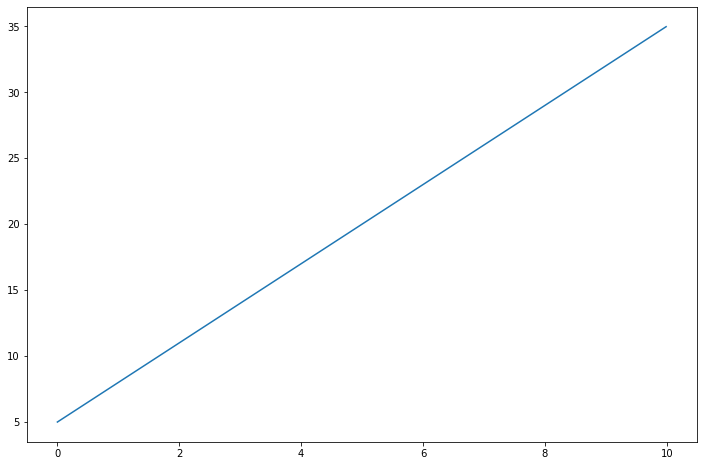

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0, 10, 0.01)
y = 3*t + 5

plt.figure(figsize=(12,8))
plt.plot(t, y)
plt.show()

In [85]:
y

array([ 5.  ,  5.03,  5.06,  5.09,  5.12,  5.15,  5.18,  5.21,  5.24,
        5.27,  5.3 ,  5.33,  5.36,  5.39,  5.42,  5.45,  5.48,  5.51,
        5.54,  5.57,  5.6 ,  5.63,  5.66,  5.69,  5.72,  5.75,  5.78,
        5.81,  5.84,  5.87,  5.9 ,  5.93,  5.96,  5.99,  6.02,  6.05,
        6.08,  6.11,  6.14,  6.17,  6.2 ,  6.23,  6.26,  6.29,  6.32,
        6.35,  6.38,  6.41,  6.44,  6.47,  6.5 ,  6.53,  6.56,  6.59,
        6.62,  6.65,  6.68,  6.71,  6.74,  6.77,  6.8 ,  6.83,  6.86,
        6.89,  6.92,  6.95,  6.98,  7.01,  7.04,  7.07,  7.1 ,  7.13,
        7.16,  7.19,  7.22,  7.25,  7.28,  7.31,  7.34,  7.37,  7.4 ,
        7.43,  7.46,  7.49,  7.52,  7.55,  7.58,  7.61,  7.64,  7.67,
        7.7 ,  7.73,  7.76,  7.79,  7.82,  7.85,  7.88,  7.91,  7.94,
        7.97,  8.  ,  8.03,  8.06,  8.09,  8.12,  8.15,  8.18,  8.21,
        8.24,  8.27,  8.3 ,  8.33,  8.36,  8.39,  8.42,  8.45,  8.48,
        8.51,  8.54,  8.57,  8.6 ,  8.63,  8.66,  8.69,  8.72,  8.75,
        8.78,  8.81,

In [83]:
np.random.randn(len(y))

array([ 0.18493739, -1.31596419, -1.33265973, -0.01539786,  0.12865343,
       -0.54776715, -0.41526402,  0.03398756, -2.18694248, -0.20730361])

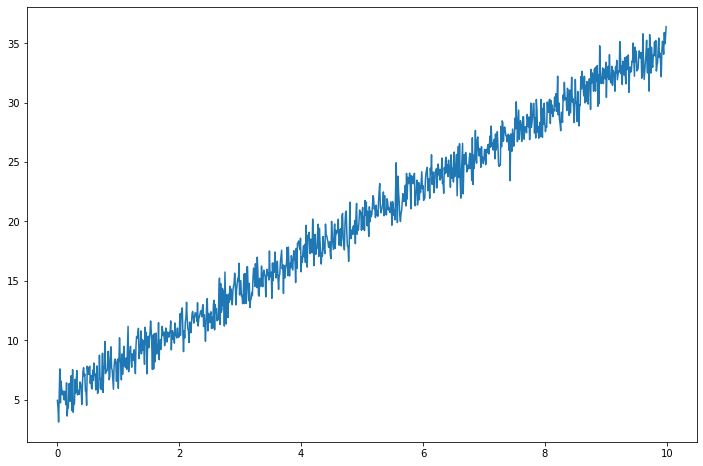

In [71]:
y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(12,8))
plt.plot(t, y_noise)
plt.show()

In [72]:
y_noise

array([ 4.93661864,  4.30162176,  3.11322234,  5.51229416,  7.58591042,
        4.72403677,  6.56090004,  5.90570353,  5.41154193,  5.73040162,
        5.42967514,  4.98418165,  5.70755639,  5.03233295,  4.56085135,
        6.40893809,  3.61565002,  4.35150704,  4.31323844,  6.35413961,
        6.30515836,  4.85955957,  6.95047402,  7.01670067,  4.07715735,
        7.51885419,  3.93990756,  4.957297  ,  4.64184905,  6.70056028,
        5.56274164,  6.66449055,  7.4399476 ,  5.40431997,  5.78080099,
        5.76030307,  5.43852672,  6.48802687,  6.40859183,  6.0515173 ,
        4.58767633,  5.99063677,  7.37498646,  7.68556597,  6.98162058,
        7.13794721,  5.73157185,  5.66213219,  4.53048033,  7.81558784,
        7.12944313,  7.69971094,  7.14483964,  7.80998678,  6.36348849,
        7.03372624,  5.99191134,  5.89499443,  7.48373337,  6.62784519,
        8.08162082,  7.03717019,  7.15601844,  5.81336528,  6.57410461,
        7.83919551,  5.52638612,  5.78521558,  6.04273568,  8.74

In [102]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x

In [103]:
fp1 = np.polyfit(x,y, 1)
fp1

array([ 1.00000000e+00, -2.80866677e-15])

In [81]:
x = np.arange(1, 11, 0.01)

In [88]:
fp1 = np.polyfit(x,y, 1)
fp1

array([ 1.00000000e+00, -2.80866677e-15])

In [96]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [101]:
df4.loc[("M", "id_1")]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64